## GeoStatistical Analysis
Author : Giuliano Langella [glangella@unina.it]

### D E F s

In [1]:
printf <- function(...) cat(sprintf(...))

### P A R s

In [2]:
file.dtm     = '~/Dropbox/dati_finali_procida/dati/DTM.tif'
file.weeks.1 = '~/git/seminars/Aedes-Procida/OVI_w1.txt'
file.weeks.2 = '~/git/seminars/Aedes-Procida/OVI_w2.txt'
file.weeks.3 = '~/git/seminars/Aedes-Procida/OVI_w3.txt'
file.weeks.4 = '~/git/seminars/Aedes-Procida/OVI_w4.txt'

### P A C K A G E S

In [3]:
require("methods")
library("sp")
library("rgdal")
library("gstat")
library("geoR")
library("raster")
require("ggplot2")
require("gridExtra")
library(googleVis)

rgdal: version: 1.2-6, (SVN revision 651)
 Geospatial Data Abstraction Library extensions to R successfully loaded
 Loaded GDAL runtime: GDAL 2.1.2, released 2016/10/24
 Path to GDAL shared files: /Library/Frameworks/R.framework/Versions/3.3/Resources/library/rgdal/gdal
 Loaded PROJ.4 runtime: Rel. 4.9.1, 04 March 2015, [PJ_VERSION: 491]
 Path to PROJ.4 shared files: /Library/Frameworks/R.framework/Versions/3.3/Resources/library/rgdal/proj
 Linking to sp version: 1.2-4 
--------------------------------------------------------------
 Analysis of Geostatistical Data
 For an Introduction to geoR go to http://www.leg.ufpr.br/geoR
 geoR version 1.7-5.2 (built on 2016-05-02) is now loaded
--------------------------------------------------------------

Loading required package: ggplot2
Loading required package: gridExtra
Creating a generic function for ‘toJSON’ from package ‘jsonlite’ in package ‘googleVis’

Welcome to googleVis version 0.6.2

Please read Google's Terms of Use
before you star

### D A T A

#### P O I N T S

In [4]:
D1 <- read.table(file.weeks.1,header = TRUE, sep = ",",na.strings = "NaN")
D2 <- read.table(file.weeks.2,header = TRUE, sep = ",",na.strings = "NaN")
D3 <- read.table(file.weeks.3,header = TRUE, sep = ",",na.strings = "NaN")
D4 <- read.table(file.weeks.4,header = TRUE, sep = ",",na.strings = "NaN")
summary(D1)
summary(D2)
summary(D3)
summary(D4)

    Easting          Northing            week       
 Min.   :415021   Min.   :4510429   Min.   :  3.00  
 1st Qu.:416507   1st Qu.:4511684   1st Qu.: 29.00  
 Median :416898   Median :4512480   Median : 58.50  
 Mean   :416970   Mean   :4512297   Mean   : 80.01  
 3rd Qu.:417448   3rd Qu.:4512842   3rd Qu.:104.50  
 Max.   :418543   Max.   :4513570   Max.   :586.00  

    Easting          Northing            week       
 Min.   :415010   Min.   :4510429   Min.   :  6.00  
 1st Qu.:416496   1st Qu.:4511671   1st Qu.: 41.00  
 Median :416910   Median :4512480   Median : 74.50  
 Mean   :416977   Mean   :4512291   Mean   : 85.99  
 3rd Qu.:417488   3rd Qu.:4512838   3rd Qu.:107.75  
 Max.   :418543   Max.   :4513570   Max.   :460.00  

    Easting          Northing            week    
 Min.   :415010   Min.   :4510429   Min.   :  2  
 1st Qu.:416477   1st Qu.:4511672   1st Qu.: 87  
 Median :416893   Median :4512500   Median :138  
 Mean   :416940   Mean   :4512296   Mean   :157  
 3rd Qu.:417474   3rd Qu.:4512843   3rd Qu.:203  
 Max.   :418543   Max.   :4513570   Max.   :726  

    Easting          Northing            week      
 Min.   :415010   Min.   :4510429   Min.   :  2.0  
 1st Qu.:416503   1st Qu.:4511721   1st Qu.: 54.0  
 Median :416893   Median :4512461   Median : 79.0  
 Mean   :416940   Mean   :4512285   Mean   :113.8  
 3rd Qu.:417469   3rd Qu.:4512843   3rd Qu.:131.0  
 Max.   :418543   Max.   :4513570   Max.   :464.0  

In [5]:
#M1 <- gvisMap(D1, "LatLong", "Tip", 
#              options=list(showTip=TRUE, showLine=F, enableScrollWheel=TRUE, 
#                           mapType='satellite', useMapTypeControl=TRUE, width=800,height=400))
#plot(M1)

#### P L O T

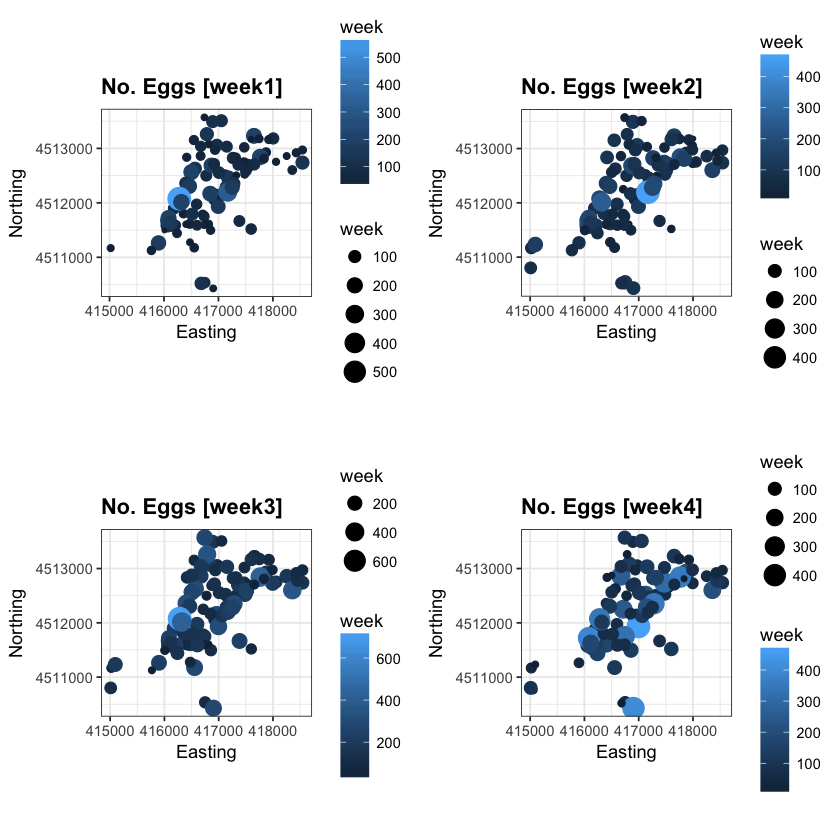

In [6]:
# ___advanced-style___
plt1 <- qplot(Easting, Northing, data=D1, colour=week, size=week) + coord_fixed(ratio = 1) + theme_bw() + ggtitle("No. Eggs [week1]") + theme(plot.title = element_text(lineheight=.8, face="bold"))
plt2 <- qplot(Easting, Northing, data=D2, colour=week, size=week) + coord_fixed(ratio = 1) + theme_bw() + ggtitle("No. Eggs [week2]") + theme(plot.title = element_text(lineheight=.8, face="bold"))
plt3 <- qplot(Easting, Northing, data=D3, colour=week, size=week) + coord_fixed(ratio = 1) + theme_bw() + ggtitle("No. Eggs [week3]") + theme(plot.title = element_text(lineheight=.8, face="bold"))
plt4 <- qplot(Easting, Northing, data=D4, colour=week, size=week) + coord_fixed(ratio = 1) + theme_bw() + ggtitle("No. Eggs [week4]") + theme(plot.title = element_text(lineheight=.8, face="bold"))
grid.arrange(plt1,plt2,plt3,plt4,ncol=2,nrow=2)

#### G R I D S

Reference system: +proj=utm +zone=33 +datum=WGS84 +units=m +no_defs +ellps=WGS84 +towgs84=0,0,0
Pixel size , 2m]


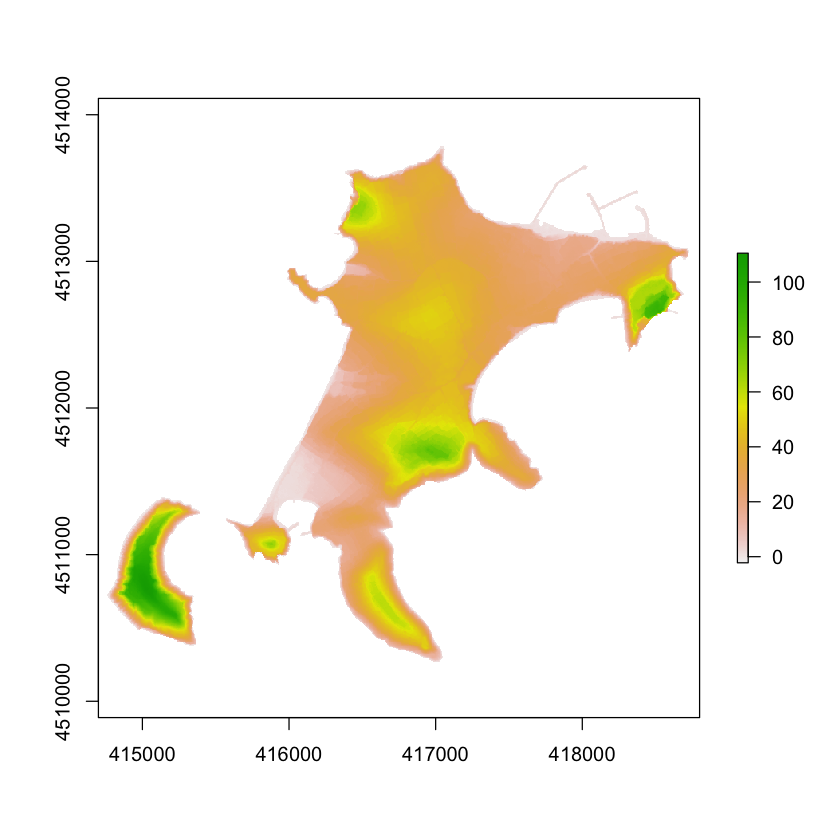

In [7]:
# grid :: import High-Res DEM
dtm<-raster(file.dtm)
printf( "Reference system: %s\n",proj4string(dtm) )
printf( "Pixel size [%dm, %dm]\n", res(dtm)[1],res(dtm)[2] ) # x-y pixel size
#plot(D1)
plot(dtm)#,add=T) # add monitoring points

In [8]:
# data
coordinates(D1) = ~Easting+Northing
coordinates(D2) = ~Easting+Northing
coordinates(D3) = ~Easting+Northing
coordinates(D4) = ~Easting+Northing
#proj4string(D1)
# Assign projection
proj4string(D1) <- CRS(proj4string(dtm))
proj4string(D2) <- CRS(proj4string(dtm))
proj4string(D3) <- CRS(proj4string(dtm))
proj4string(D4) <- CRS(proj4string(dtm))
#proj4string(D1)

In [9]:
grd <- as(dtm, 'SpatialGridDataFrame')
p <- as(dtm, 'SpatialPixels')
#plot(grd)
#points(p)
#coordinates(grd) = ~Easting+Northing
gridded(grd) = TRUE

In [10]:
class(grd)
class(p)

[1] "SpatialGridDataFrame"
attr(,"package")
[1] "sp"

[1] "SpatialPixels"
attr(,"package")
[1] "sp"

### V A R I O G R A P H Y

#### NOTES:
Consider the calculation of ninety-five percent confidence intervals for the experimental semivariograms (Cressie, 1993, <a href="http://link.springer.com/article/10.1007/s10109-008-0070-8">PR Trawinski & DS Mackay</a>)

#### Ordinary kriging (OK)
The random field (RF) $\mathbf{Z}(\mathbf{u})$ is assumed to be intrinsic second‐order stationary if the first two moments (i.e. mean $\mathit{m}$ and semivariance $\gamma(\mathbf{h})$) of the two‐point RF increments exist and are invariant under translation and rotation within a bounded area $\mathfrak{D}$ (Goovaerts1997_book, Wackernagel2003_book):

\begin{eqnarray}
m &=& E \{ Z(\mathbf{u}) \} \nonumber\\
\gamma(\mathbf{h}) &=& \frac{1}{2}E\left\lbrace\left[ Z\left( \mathbf{u} \right) - Z\left( \mathbf{u}+\mathbf{h} \right) \right]^2 \right\rbrace
\end{eqnarray}

with theoretically infinite points locations ${u}(\mathbf{x})\in\mathfrak{D}$, and random variables (RV) $Z(\mathbf{u})$ and $Z(\mathbf{u}+\mathbf{h})$ separated by the distance vector $h(\mathbf{x})$, where $\textbf{x}$ represents the coordinates $(\mathbf{x}_1,\mathbf{x}_2,\mathbf{x}_3)\in\Re^3$.

#### Multicollocated ordinary cokriging (MOCoK)
The use of hard secondary information leads to modeling a coregionalization in the context of a joint intrinsic hypothesis. Under this hypothesis the first and second order moments of a set of K spatially intercorrelated RF $\{Z_i(\mathbf{u}),i=1\; to\; K)\}$ are defined as

\begin{equation}
\begin{cases}
m_i=E[Z_i(\mathbf{u})] \\
\gamma_{ii^{'}}(\mathbf{h}) = \frac{1}{2}E \left[ \left( Z_i(\mathbf{u}) - Z_i(\mathbf{u}+\mathbf{h})\right) \ast \left( Z_{i^{'}}(\mathbf{u}) - Z_{i^{'}}(\mathbf{u}+\mathbf{h})\right) \right]
\end{cases} \forall \; \mathbf{u},i,i^{'}
\end{equation}

with $\mathbf{u},\;\mathbf{h}\in\mathfrak{D}\subset\Re^3$.

#### omnidirectional | raw scale

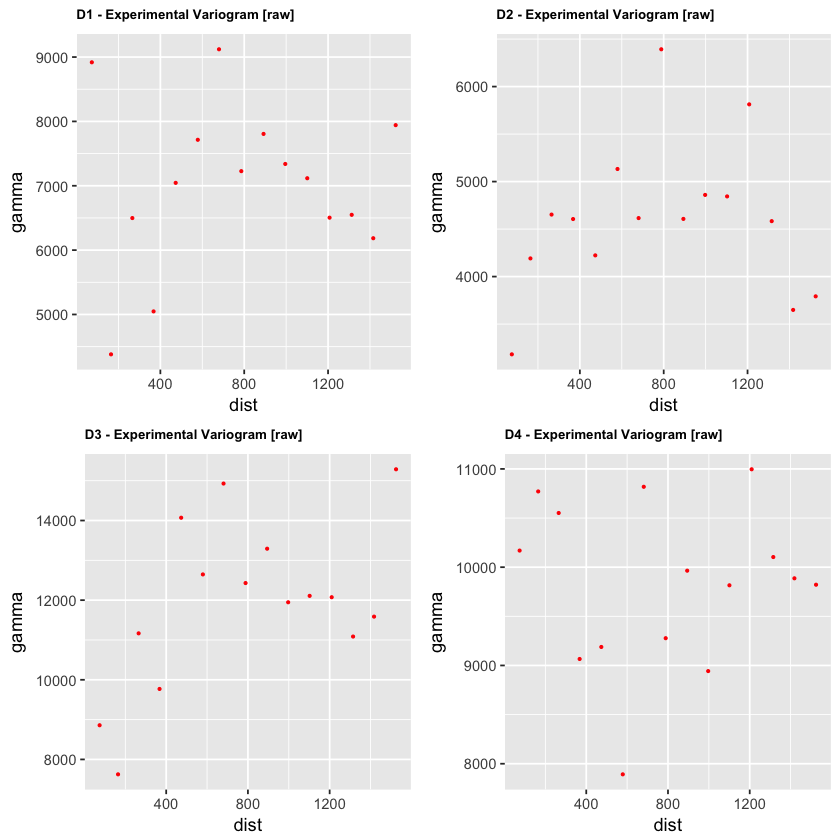

In [11]:
vgm.exp.raw.D1 = variogram( week~1, D1 )
vgm.exp.raw.D2 = variogram( week~1, D2 )
vgm.exp.raw.D3 = variogram( week~1, D3 )
vgm.exp.raw.D4 = variogram( week~1, D4 )
plt1 <- ggplot(data=vgm.exp.raw.D1,aes(x=dist,y=gamma)) + geom_point(color='red',size=0.5) + ggtitle("D1 - Experimental Variogram [raw]") + theme(plot.title = element_text(size=8,lineheight=.8, face="bold"))
plt2 <- ggplot(data=vgm.exp.raw.D2,aes(x=dist,y=gamma)) + geom_point(color='red',size=0.5) + ggtitle("D2 - Experimental Variogram [raw]") + theme(plot.title = element_text(size=8,lineheight=.8, face="bold"))
plt3 <- ggplot(data=vgm.exp.raw.D3,aes(x=dist,y=gamma)) + geom_point(color='red',size=0.5) + ggtitle("D3 - Experimental Variogram [raw]") + theme(plot.title = element_text(size=8,lineheight=.8, face="bold"))
plt4 <- ggplot(data=vgm.exp.raw.D4,aes(x=dist,y=gamma)) + geom_point(color='red',size=0.5) + ggtitle("D4 - Experimental Variogram [raw]") + theme(plot.title = element_text(size=8,lineheight=.8, face="bold"))
grid.arrange(plt1,plt2,plt3,plt4,ncol=2,nrow=2)

#### omnidirectional | log scale

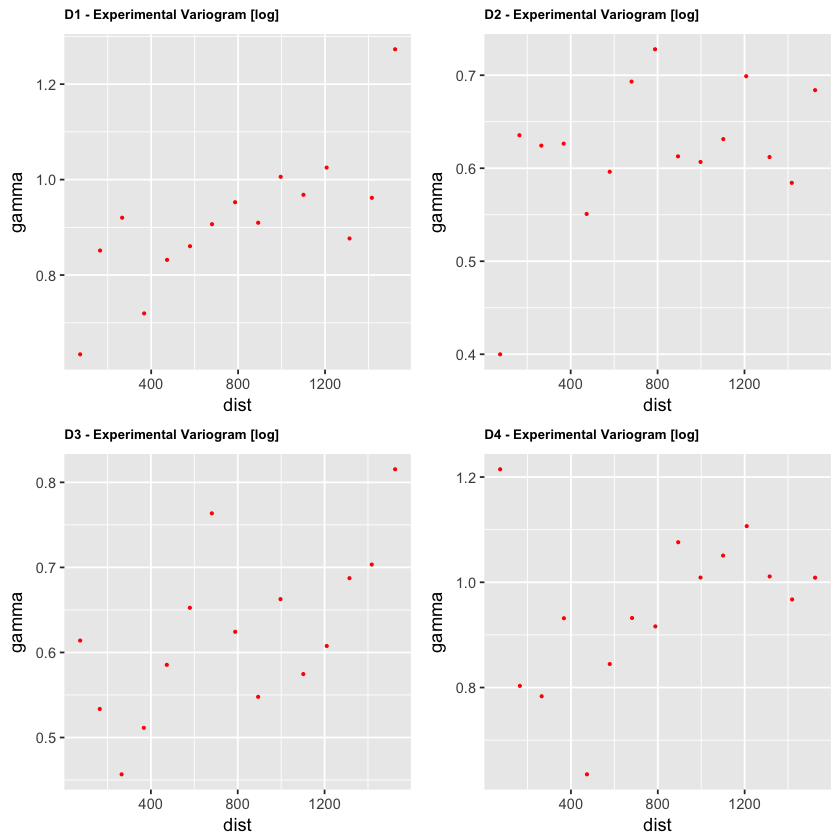

In [12]:
vgm.exp.log.D1 = variogram( log(week)~1, D1 )
vgm.exp.log.D2 = variogram( log(week)~1, D2 )
vgm.exp.log.D3 = variogram( log(week)~1, D3 )
vgm.exp.log.D4 = variogram( log(week)~1, D4 )
plt1 <- ggplot(data=vgm.exp.log.D1,aes(x=dist,y=gamma)) + geom_point(color='red',size=0.5) + ggtitle("D1 - Experimental Variogram [log]") + theme(plot.title = element_text(size=8,lineheight=.8, face="bold"))
plt2 <- ggplot(data=vgm.exp.log.D2,aes(x=dist,y=gamma)) + geom_point(color='red',size=0.5) + ggtitle("D2 - Experimental Variogram [log]") + theme(plot.title = element_text(size=8,lineheight=.8, face="bold"))
plt3 <- ggplot(data=vgm.exp.log.D3,aes(x=dist,y=gamma)) + geom_point(color='red',size=0.5) + ggtitle("D3 - Experimental Variogram [log]") + theme(plot.title = element_text(size=8,lineheight=.8, face="bold"))
plt4 <- ggplot(data=vgm.exp.log.D4,aes(x=dist,y=gamma)) + geom_point(color='red',size=0.5) + ggtitle("D4 - Experimental Variogram [log]") + theme(plot.title = element_text(size=8,lineheight=.8, face="bold"))
grid.arrange(plt1,plt2,plt3,plt4,ncol=2,nrow=2)

#### explore | low(Dist) & high(Var) points

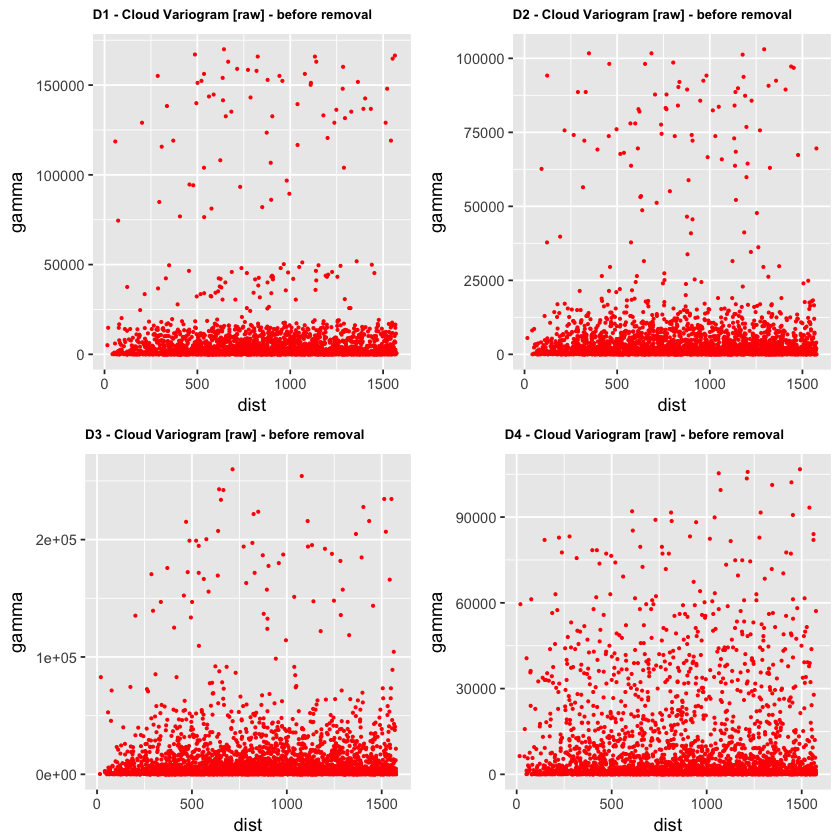

In [13]:
#summary(vgm.exp.raw.D1c_rd$dist)
#qqplot(vgm.exp.raw.D1c_rd$dist)
vgm.exp.raw.D1c_rd = variogram( week~1, D1, cloud=TRUE)
vgm.exp.raw.D2c_rd = variogram( week~1, D2, cloud=TRUE)
vgm.exp.raw.D3c_rd = variogram( week~1, D3, cloud=TRUE)
vgm.exp.raw.D4c_rd = variogram( week~1, D4, cloud=TRUE)
#plot(vgm.exp.raw.D1c_rd)

plt1 <- ggplot(data=vgm.exp.raw.D1c_rd,aes(x=dist,y=gamma)) + geom_point(color='red',size=0.5) + ggtitle("D1 - Cloud Variogram [raw] - before removal") + theme(plot.title = element_text(size=8,lineheight=.8, face="bold"))
plt2 <- ggplot(data=vgm.exp.raw.D2c_rd,aes(x=dist,y=gamma)) + geom_point(color='red',size=0.5) + ggtitle("D2 - Cloud Variogram [raw] - before removal") + theme(plot.title = element_text(size=8,lineheight=.8, face="bold"))
plt3 <- ggplot(data=vgm.exp.raw.D3c_rd,aes(x=dist,y=gamma)) + geom_point(color='red',size=0.5) + ggtitle("D3 - Cloud Variogram [raw] - before removal") + theme(plot.title = element_text(size=8,lineheight=.8, face="bold"))
plt4 <- ggplot(data=vgm.exp.raw.D4c_rd,aes(x=dist,y=gamma)) + geom_point(color='red',size=0.5) + ggtitle("D4 - Cloud Variogram [raw] - before removal") + theme(plot.title = element_text(size=8,lineheight=.8, face="bold"))
grid.arrange(plt1,plt2,plt3,plt4,ncol=2,nrow=2)

#### remove couples with high covariance but short distance apart:

In [14]:
#   <D1>
rm_D = 250.0
rm_G = 12000
short_dist 	<- vgm.exp.raw.D1c_rd[which(vgm.exp.raw.D1c_rd$dist<rm_D),]
high_gamma 	<- short_dist[which(short_dist$gamma>rm_G),]
high_gamma 	<- data.frame(high_gamma)
list_remove <- sort(unique( c(high_gamma$left,high_gamma$right) ))
rem.D1 <- length(list_remove)
if(length(list_remove)==0){
	D1_rd <- D1
}else{
	D1_rd <- D1[-list_remove,]
}
printf("Removed [D1]: %d\n", rem.D1)

#   <D2>
rm_D = 250.0
rm_G = 20000
short_dist 	<- vgm.exp.raw.D2c_rd[which(vgm.exp.raw.D2c_rd$dist<rm_D),]
high_gamma 	<- short_dist[which(short_dist$gamma>rm_G),]
high_gamma 	<- data.frame(high_gamma)
list_remove <- sort(unique( c(high_gamma$left,high_gamma$right) ))
rem.D2 <- length(list_remove)
if(length(list_remove)==0){
	D2_rd <- D2
}else{
	D2_rd <- D2[-list_remove,]
}
printf("Removed [D2]: %d\n", rem.D2)

#   <D3>
rm_D = 250.0
rm_G = 20000
short_dist 	<- vgm.exp.raw.D3c_rd[which(vgm.exp.raw.D3c_rd$dist<rm_D),]
high_gamma 	<- short_dist[which(short_dist$gamma>rm_G),]
high_gamma 	<- data.frame(high_gamma)
list_remove <- sort(unique( c(high_gamma$left,high_gamma$right) ))
rem.D3 <- length(list_remove)
if(length(list_remove)==0){
	D3_rd <- D3
}else{
	D3_rd <- D3[-list_remove,]
}
printf("Removed [D3]: %d\n", rem.D3)

#   <D4>
rm_D = 250.0
rm_G = 20000
short_dist 	<- vgm.exp.raw.D4c_rd[which(vgm.exp.raw.D4c_rd$dist<rm_D),]
high_gamma 	<- short_dist[which(short_dist$gamma>rm_G),]
high_gamma 	<- data.frame(high_gamma)
list_remove <- sort(unique( c(high_gamma$left,high_gamma$right) ))
rem.D4 <- length(list_remove)
if(length(list_remove)==0){
	D4_rd <- D4
}else{
	D4_rd <- D4[-list_remove,]
}
printf("Removed [D4]: %d\n", rem.D4)

Removed [D1]: 21
Removed [D2]: 6
Removed [D3]: 23
Removed [D4]: 36


#### omnidirectional | raw scale | after removal

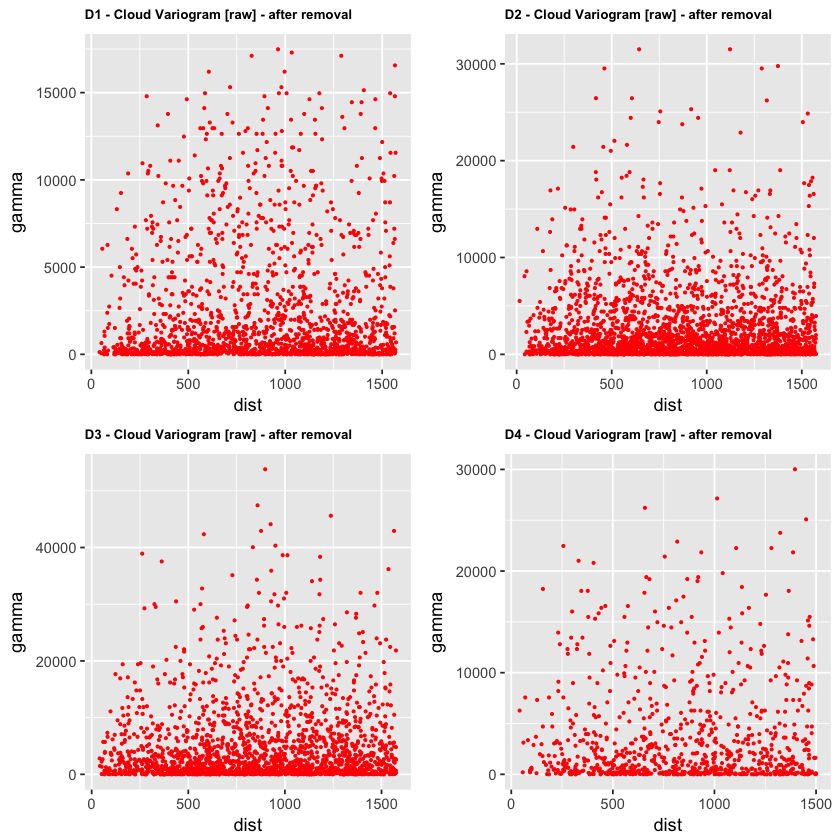

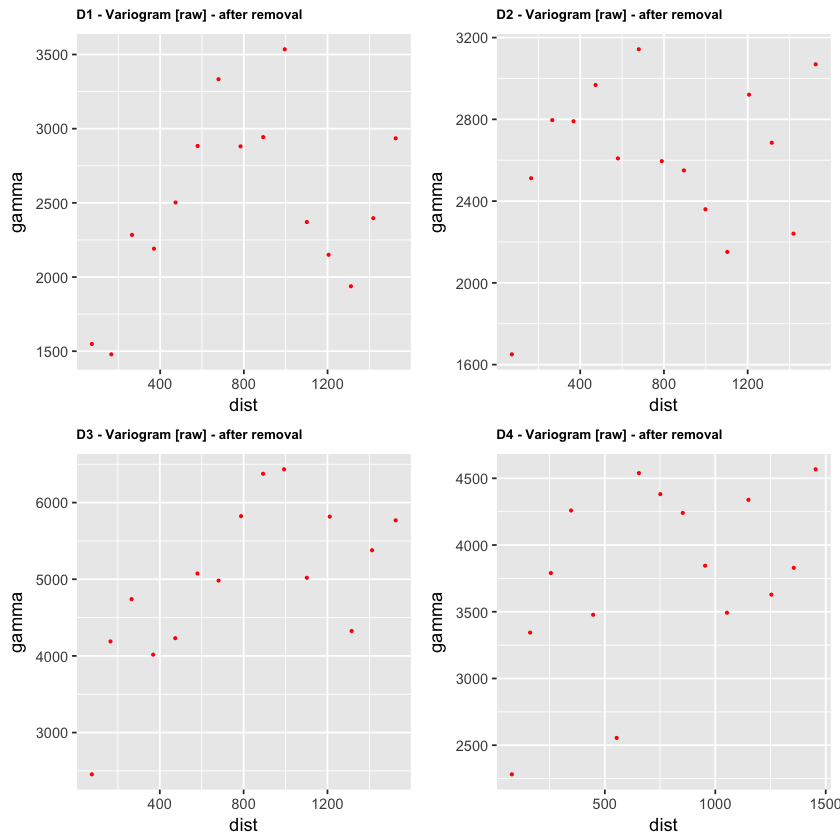

In [15]:
# <variogram cloud>
vgm.exp.raw.D1c_rd.rd = variogram( week~1, D1_rd, cloud=TRUE)
vgm.exp.raw.D2c_rd.rd = variogram( week~1, D2_rd, cloud=TRUE)
vgm.exp.raw.D3c_rd.rd = variogram( week~1, D3_rd, cloud=TRUE)
vgm.exp.raw.D4c_rd.rd = variogram( week~1, D4_rd, cloud=TRUE)
# <variogram cloud | plot>
plt1 <- ggplot(data=vgm.exp.raw.D1c_rd.rd,aes(x=dist,y=gamma)) + geom_point(color='red',size=0.5) + ggtitle("D1 - Cloud Variogram [raw] - after removal") + theme(plot.title = element_text(size=8,lineheight=.8, face="bold"))
plt2 <- ggplot(data=vgm.exp.raw.D2c_rd.rd,aes(x=dist,y=gamma)) + geom_point(color='red',size=0.5) + ggtitle("D2 - Cloud Variogram [raw] - after removal") + theme(plot.title = element_text(size=8,lineheight=.8, face="bold"))
plt3 <- ggplot(data=vgm.exp.raw.D3c_rd.rd,aes(x=dist,y=gamma)) + geom_point(color='red',size=0.5) + ggtitle("D3 - Cloud Variogram [raw] - after removal") + theme(plot.title = element_text(size=8,lineheight=.8, face="bold"))
plt4 <- ggplot(data=vgm.exp.raw.D4c_rd.rd,aes(x=dist,y=gamma)) + geom_point(color='red',size=0.5) + ggtitle("D4 - Cloud Variogram [raw] - after removal") + theme(plot.title = element_text(size=8,lineheight=.8, face="bold"))
grid.arrange(plt1,plt2,plt3,plt4,ncol=2,nrow=2)

# <variogram>
vgm.exp.raw.D1_rd = variogram( week~1, D1_rd)# vgm( psill, model, range, nugget )
vgm.exp.raw.D2_rd = variogram( week~1, D2_rd)# vgm( psill, model, range, nugget )
vgm.exp.raw.D3_rd = variogram( week~1, D3_rd)# vgm( psill, model, range, nugget )
vgm.exp.raw.D4_rd = variogram( week~1, D4_rd)# vgm( psill, model, range, nugget )
# <variogram | plot>
#plt1 <- plot(vgm.exp.raw.D1_rd)
#plt2 <- plot(vgm.exp.raw.D2_rd)
#plt3 <- plot(vgm.exp.raw.D3_rd)
#plt4 <- plot(vgm.exp.raw.D4_rd)
plt1 <- ggplot(data=vgm.exp.raw.D1_rd,aes(x=dist,y=gamma)) + geom_point(color='red',size=0.5) + ggtitle("D1 - Variogram [raw] - after removal") + theme(plot.title = element_text(size=8,lineheight=.8, face="bold"))
plt2 <- ggplot(data=vgm.exp.raw.D2_rd,aes(x=dist,y=gamma)) + geom_point(color='red',size=0.5) + ggtitle("D2 - Variogram [raw] - after removal") + theme(plot.title = element_text(size=8,lineheight=.8, face="bold"))
plt3 <- ggplot(data=vgm.exp.raw.D3_rd,aes(x=dist,y=gamma)) + geom_point(color='red',size=0.5) + ggtitle("D3 - Variogram [raw] - after removal") + theme(plot.title = element_text(size=8,lineheight=.8, face="bold"))
plt4 <- ggplot(data=vgm.exp.raw.D4_rd,aes(x=dist,y=gamma)) + geom_point(color='red',size=0.5) + ggtitle("D4 - Variogram [raw] - after removal") + theme(plot.title = element_text(size=8,lineheight=.8, face="bold"))
grid.arrange(plt1,plt2,plt3,plt4,ncol=2,nrow=2)

##### Variogram FITTING after removal

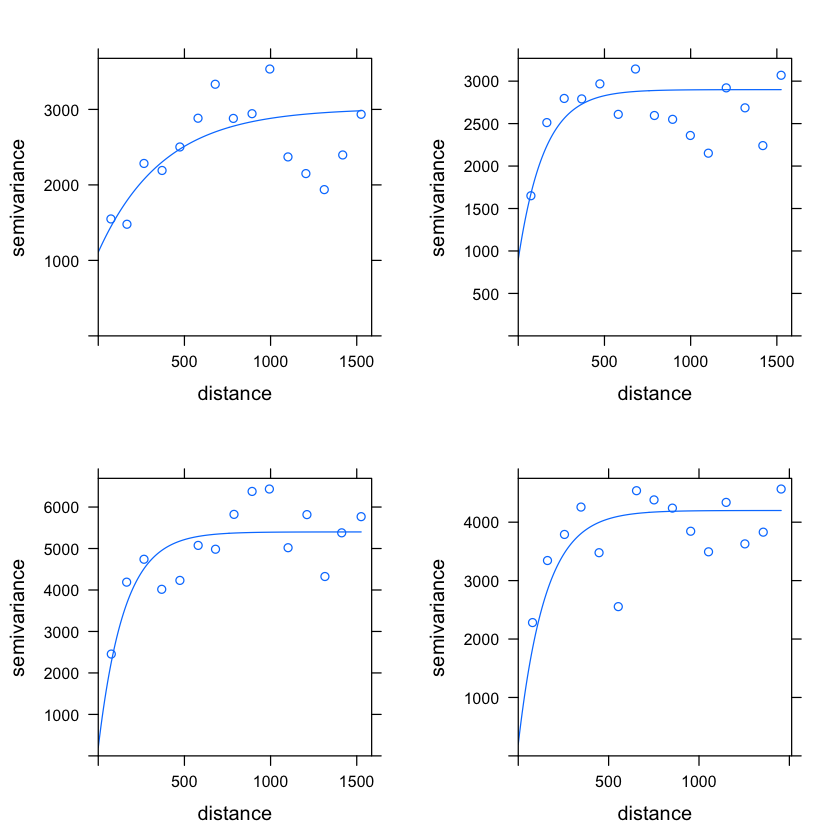

In [16]:
# <D1>
psill 	= 2000#max(vgm.exp.raw.D1_rd$gamma) - min(vgm.exp.raw.D1_rd$gamma)
range 	= 100#max(vgm.exp.raw.D1_rd$dist)/6
nugget 	= 600#vgm.exp.raw.D1_rd$gamma[1]/2
vgm.fit.raw.D1_rd = fit.variogram( vgm.exp.raw.D1_rd, model=vgm(psill,'Exp',range,nugget), fit.sills = TRUE, fit.ranges = TRUE, fit.method = 7, debug.level = 1, warn.if.neg = TRUE )
plt1 <- plot(vgm.exp.raw.D1_rd,vgm.fit.raw.D1_rd)
# <D2>
psill 	= 2000#max(vgm.exp.raw.D2_rd$gamma) - min(vgm.exp.raw.L1_rd$gamma)
range 	= 150#max(vgm.exp.raw.D2_rd$dist)/6
nugget 	= 900#vgm.exp.raw.D2_rd$gamma[1]/2
vgm.fit.raw.D2_rd = fit.variogram( vgm.exp.raw.D2_rd, model=vgm(psill,'Exp',range,nugget), fit.sills = FALSE, fit.ranges = FALSE, fit.method = 7, debug.level = 1, warn.if.neg = TRUE )
#vgm.fit.raw.D2_rd = fit.variogram( vgm.exp.raw.D2_rd, model=vgm(psill,'Gau',range,nugget), fit.sills = FALSE, fit.ranges = FALSE, fit.method = 7, debug.level = 1, warn.if.neg = TRUE )
#vgm.fit.raw.D2_rd = fit.variogram( vgm.exp.raw.D2_rd, model=vgm(psill,'Sph',range,nugget), fit.sills = FALSE, fit.ranges = FALSE, fit.method = 7, debug.level = 1, warn.if.neg = TRUE )
plt2 <- plot(vgm.exp.raw.D2_rd,vgm.fit.raw.D2_rd)
# <D3>
psill 	= 5200#max(vgm.exp.raw.D2_rd$gamma) - min(vgm.exp.raw.L1_rd$gamma)
range 	= 150#max(vgm.exp.raw.D2_rd$dist)/6
nugget 	= 200#vgm.exp.raw.D2_rd$gamma[1]/2
vgm.fit.raw.D3_rd = fit.variogram( vgm.exp.raw.D3_rd, model=vgm(psill,'Exp',range,nugget), fit.sills = FALSE, fit.ranges = FALSE, fit.method = 7, debug.level = 1, warn.if.neg = TRUE )
#vgm.fit.raw.D2_rd = fit.variogram( vgm.exp.raw.D2_rd, model=vgm(psill,'Gau',range,nugget), fit.sills = FALSE, fit.ranges = FALSE, fit.method = 7, debug.level = 1, warn.if.neg = TRUE )
#vgm.fit.raw.D2_rd = fit.variogram( vgm.exp.raw.D2_rd, model=vgm(psill,'Sph',range,nugget), fit.sills = FALSE, fit.ranges = FALSE, fit.method = 7, debug.level = 1, warn.if.neg = TRUE )
plt3 <- plot(vgm.exp.raw.D3_rd,vgm.fit.raw.D3_rd)
# <D4>
psill 	= 4000#max(vgm.exp.raw.D2_rd$gamma) - min(vgm.exp.raw.L1_rd$gamma)
range 	= 150#max(vgm.exp.raw.D2_rd$dist)/6
nugget 	= 200#vgm.exp.raw.D2_rd$gamma[1]/2
vgm.fit.raw.D4_rd = fit.variogram( vgm.exp.raw.D4_rd, model=vgm(psill,'Exp',range,nugget), fit.sills = FALSE, fit.ranges = FALSE, fit.method = 7, debug.level = 1, warn.if.neg = TRUE )
#vgm.fit.raw.D2_rd = fit.variogram( vgm.exp.raw.D2_rd, model=vgm(psill,'Gau',range,nugget), fit.sills = FALSE, fit.ranges = FALSE, fit.method = 7, debug.level = 1, warn.if.neg = TRUE )
#vgm.fit.raw.D2_rd = fit.variogram( vgm.exp.raw.D2_rd, model=vgm(psill,'Sph',range,nugget), fit.sills = FALSE, fit.ranges = FALSE, fit.method = 7, debug.level = 1, warn.if.neg = TRUE )
plt4 <- plot(vgm.exp.raw.D4_rd,vgm.fit.raw.D4_rd)

#plt1 <- ggplot(data=vgm.exp.raw.D1c_rd,aes(x=dist,y=gamma)) + geom_point(color='red',size=0.5) + ggtitle("D1 - Experimental Variogram [raw] - after removal") + theme(plot.title = element_text(size=8,lineheight=.8, face="bold"))
#plt2 <- ggplot(data=vgm.exp.raw.D2c_rd,aes(x=dist,y=gamma)) + geom_point(color='red',size=0.5) + ggtitle("D2 - Experimental Variogram [raw] - after removal") + theme(plot.title = element_text(size=8,lineheight=.8, face="bold"))
#plt3 <- ggplot(data=vgm.exp.raw.D3c_rd,aes(x=dist,y=gamma)) + geom_point(color='red',size=0.5) + ggtitle("D3 - Experimental Variogram [raw] - after removal") + theme(plot.title = element_text(size=8,lineheight=.8, face="bold"))
#plt4 <- ggplot(data=vgm.exp.raw.D4c_rd,aes(x=dist,y=gamma)) + geom_point(color='red',size=0.5) + ggtitle("D4 - Experimental Variogram [raw] - after removal") + theme(plot.title = element_text(size=8,lineheight=.8, face="bold"))
grid.arrange(plt1,plt2,plt3,plt4,ncol=2,nrow=2)

In [17]:
printf("Variogram Model | D1")
vgm.fit.raw.D1_rd
printf("Variogram Model | D2")
vgm.fit.raw.D2_rd
printf("Variogram Model | D3")
vgm.fit.raw.D3_rd
printf("Variogram Model | D4")
vgm.fit.raw.D4_rd

Variogram Model | D1

model,psill,range,kappa,ang1,ang2,ang3,anis1,anis2
Nug,1108.755,0.0000,0.0,0,0,0,1,1
Exp,1906.419,376.0198,0.5,0,0,0,1,1


Variogram Model | D2

model,psill,range,kappa,ang1,ang2,ang3,anis1,anis2
Nug,900,0,0.0,0,0,0,1,1
Exp,2000,150,0.5,0,0,0,1,1


Variogram Model | D3

model,psill,range,kappa,ang1,ang2,ang3,anis1,anis2
Nug,200,0,0.0,0,0,0,1,1
Exp,5200,150,0.5,0,0,0,1,1


Variogram Model | D4

model,psill,range,kappa,ang1,ang2,ang3,anis1,anis2
Nug,200,0,0.0,0,0,0,1,1
Exp,4000,150,0.5,0,0,0,1,1


### I N T E R P O L A T I O N

####   -resample DTM at 10m, ~snapped

In [18]:
#dtm10 <- aggregate( dtm , fact = 5 , method = "bilinear" )
#dtm20 <- aggregate( dtm , fact = 5 , method = "bilinear" )

#...peformered in MatLab!
file.dtm10   = '~/git/seminars/Aedes-Procida/dtm10m.tif'
file.dtm20   = '~/git/seminars/Aedes-Procida/dtm20m.tif'
#dtm10[dtm10==-9999]=NA
#dtm20[dtm20==-9999]=NA
dtm10<-raster(file.dtm10)
dtm20<-raster(file.dtm20)

In [19]:
grd10 <- as(dtm10, 'SpatialGridDataFrame')
gridded(grd10) = TRUE
grd20 <- as(dtm20, 'SpatialGridDataFrame')
gridded(grd20) = TRUE

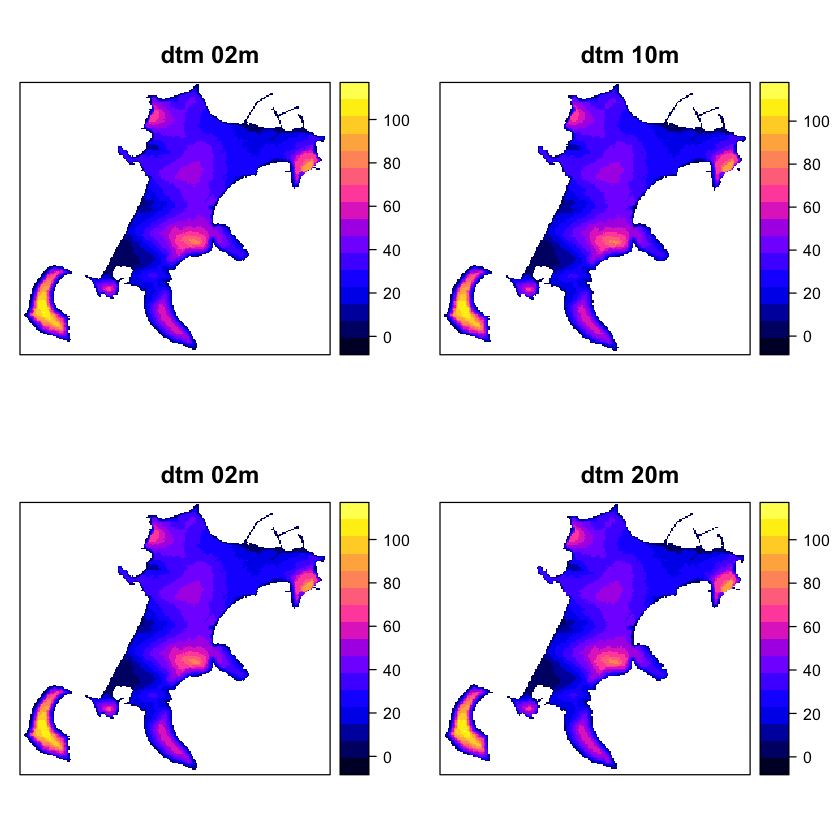

In [20]:
plt0<-spplot(dtm,main="dtm 02m")
plt1<-spplot(dtm10,main="dtm 10m")
plt2<-spplot(dtm20,main="dtm 20m")
grid.arrange(plt0,plt1,plt0,plt2,ncol=2,nrow=2)

####   -Measurements | SpatialPointsDataFrame + proj4string

In [21]:
# Assign projection
proj4string(D1_rd) <- CRS(proj4string(dtm))
proj4string(D2_rd) <- CRS(proj4string(dtm))
proj4string(D3_rd) <- CRS(proj4string(dtm))
proj4string(D4_rd) <- CRS(proj4string(dtm))

####   -ok  |  global neighbourhood ( [x] time consuming :: dtm + global )

In [22]:
#krg.ok.D1 = krige(week~1, D1_rd, grd, model = vgm.fit.raw.D1_rd)
#spplot(krg.ok.D1["var1.pred"],  main = paste(D1_rd$week,"ok global"))

#### -ok  |  local neighbourhood ( [v] time consuming :: dtm 2m )

In [23]:
#krg.ok.raw.D1 = krige(week~1, D1_rd, grd, model = vgm.fit.raw.D1_rd, nmax=20, nmin=5, maxdist=60)
#krg.ok.raw.D2 = krige(week~1, D2_rd, grd, model = vgm.fit.raw.D2_rd, nmax=20, nmin=5, maxdist=60)
#krg.ok.raw.D3 = krige(week~1, D3_rd, grd, model = vgm.fit.raw.D3_rd, nmax=20, nmin=5, maxdist=60)
#krg.ok.raw.D4 = krige(week~1, D4_rd, grd, model = vgm.fit.raw.D4_rd, nmax=20, nmin=5, maxdist=60)

#### -ok  |  local neighbourhood ( [v] smart :: dtm10 )

In [24]:
# Excluding removed points:
#krg.ok.raw.D1 = krige(week~1, D1_rd, grd10, model = vgm.fit.raw.D1_rd, nmax=20, nmin=5, maxdist=350)
#krg.ok.raw.D2 = krige(week~1, D2_rd, grd10, model = vgm.fit.raw.D2_rd, nmax=20, nmin=5, maxdist=150)
#krg.ok.raw.D3 = krige(week~1, D3_rd, grd10, model = vgm.fit.raw.D3_rd, nmax=20, nmin=5, maxdist=150)
#krg.ok.raw.D4 = krige(week~1, D4_rd, grd10, model = vgm.fit.raw.D4_rd, nmax=20, nmin=5, maxdist=150)

In [25]:
# All points:
krg.ok.raw.D1 = krige(week~1, D1, grd10, model = vgm.fit.raw.D1_rd, nmax=20, nmin=5)#, maxdist=350)
krg.ok.raw.D2 = krige(week~1, D2, grd10, model = vgm.fit.raw.D2_rd, nmax=20, nmin=5)#, maxdist=150)
krg.ok.raw.D3 = krige(week~1, D3, grd10, model = vgm.fit.raw.D3_rd, nmax=20, nmin=5)#, maxdist=150)
krg.ok.raw.D4 = krige(week~1, D4, grd10, model = vgm.fit.raw.D4_rd, nmax=20, nmin=5)#, maxdist=150)

[using ordinary kriging]
[using ordinary kriging]
[using ordinary kriging]
[using ordinary kriging]


####   --- plot | predictions

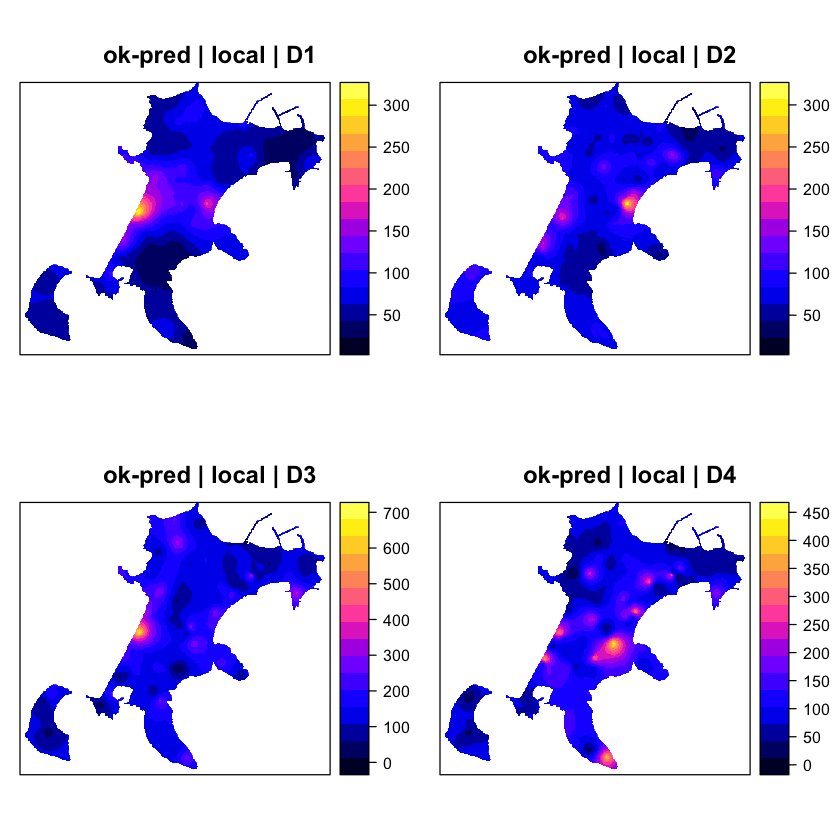

In [26]:
plt1 <- spplot(krg.ok.raw.D1["var1.pred"],  main = "ok-pred | local | D1") #paste(D1_rd$week,"ok global"))
plt2 <- spplot(krg.ok.raw.D2["var1.pred"],  main = "ok-pred | local | D2")
plt3 <- spplot(krg.ok.raw.D3["var1.pred"],  main = "ok-pred | local | D3")
plt4 <- spplot(krg.ok.raw.D4["var1.pred"],  main = "ok-pred | local | D4")
grid.arrange(plt1,plt2,plt3,plt4,ncol=2,nrow=2)

####   --- plot | variances

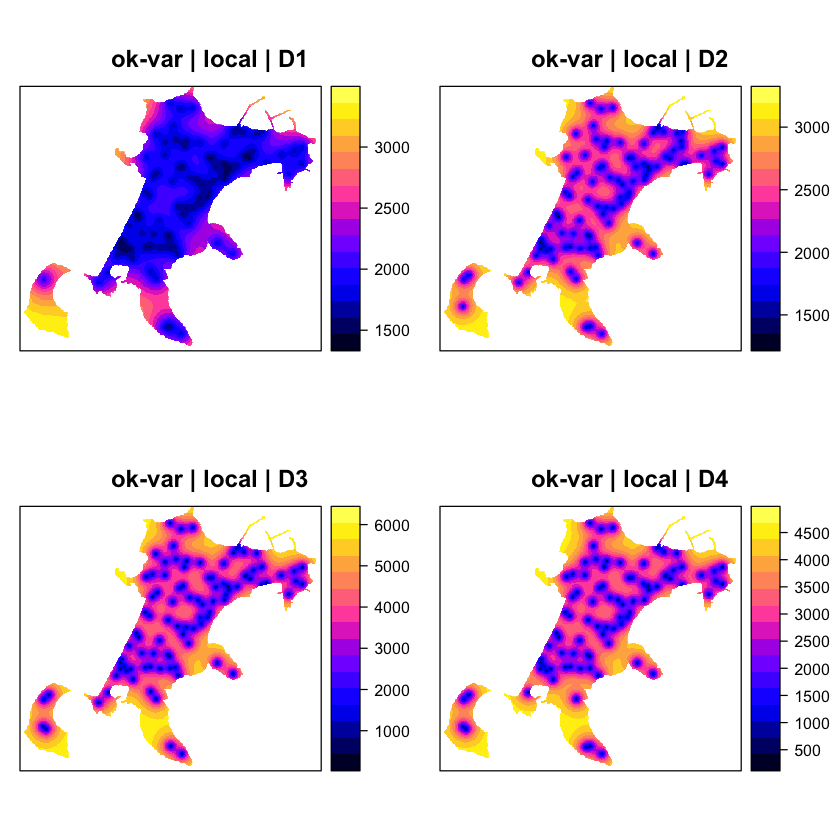

In [27]:
plt1 <- spplot(krg.ok.raw.D1["var1.var"],  main = "ok-var | local | D1") #paste(D1_rd$week,"ok global"))
plt2 <- spplot(krg.ok.raw.D2["var1.var"],  main = "ok-var | local | D2")
plt3 <- spplot(krg.ok.raw.D3["var1.var"],  main = "ok-var | local | D3")
plt4 <- spplot(krg.ok.raw.D4["var1.var"],  main = "ok-var | local | D4")
grid.arrange(plt1,plt2,plt3,plt4,ncol=2,nrow=2)